# **Chapter 1 Data Merging Basics**

Learn how you can merge disparate data using inner joins. By combining information from multiple sources you’ll uncover compelling insights that may have previously been hidden. You’ll also learn how the relationship between those sources, such as one-to-one or one-to-many, can affect your result.


[Link for reference](https://github.com/elmoallistair/datacamp/blob/master/cleaning-data-in-python/01_common-data-problems.md)

In [3]:
import pandas as pd 

#assign name a your file and paste the pathway of the file
taxi_owners = pd.read_pickle("taxi_owners.p")
taxi_veh = pd.read_pickle("taxi_vehicles.p")
wards = pd.read_pickle("ward.p")
census = pd.read_pickle("census.p")
biz_owners = pd.read_pickle("business_owners.p")
ridership = pd.read_pickle("cta_ridership.p")
cal = pd.read_pickle("cta_calendar.p")
stations = pd.read_pickle("stations.p")
land_use = pd.read_pickle("land_use.p")


Your first inner join

In [4]:
# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid')

# Print the column names of the taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')


In [5]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes =('_own','_veh'))

# Print the column names of taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')


In [6]:
# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

fuel_type
HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: count, dtype: int64


Inner joins and number of rows returned


In [7]:
# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on='ward')

# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)

wards_census table shape: (50, 9)


Inner joins and number of rows returned 2

In [8]:
# Print the first few rows of the census_altered table to view the change 
print(census_altered[['ward']].head())

# Merge the wards and census_altered tables on the ward column
wards_census_altered = wards.merge(census_altered, on='ward')

# Print the shape of wards_census_altered
print('wards_census_altered table shape:', wards_census_altered.shape)

NameError: name 'census_altered' is not defined

In [ ]:
# Print the first few rows of the census_altered table to view the change 
print(census_altered[['ward']].head())

# Merge the wards and census_altered tables on the ward column
wards_census_altered = wards.merge(census_altered, on='ward')

# Print the shape of wards_census_altered
print('wards_census_altered table shape:', wards_census_altered.shape)

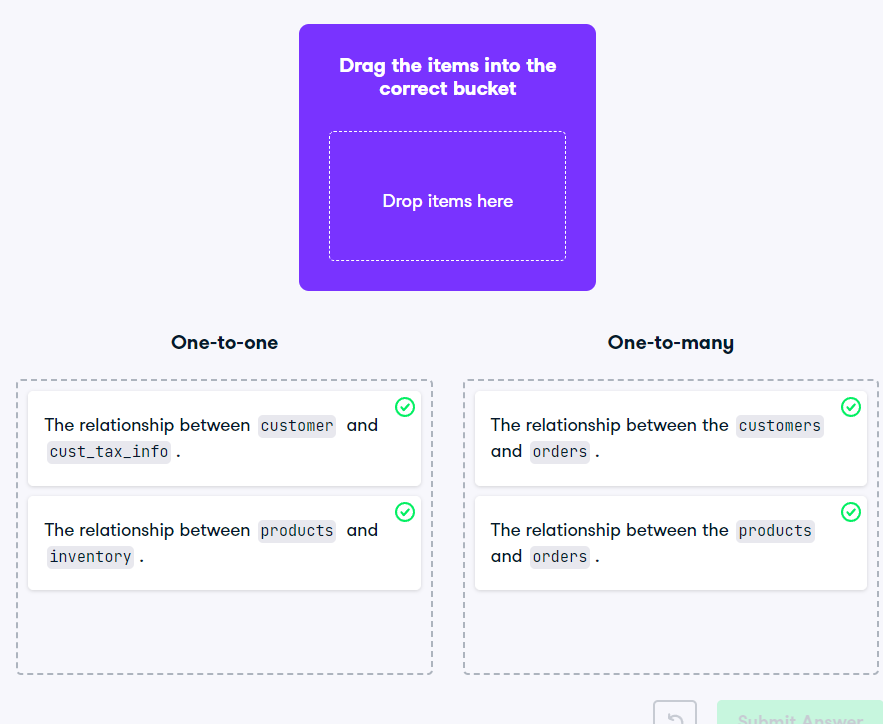

One-to-many merge


In [ ]:
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on='account')

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account':'count'})

# Sort the counted_df in desending order
sorted_df = counted_df.sort_values(by='account', ascending=False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())

                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


Total riders in a month


In [ ]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal, on=['year', 'month', 'day'])

In [ ]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
            				.merge(stations, on='station_id')

In [ ]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


Three table merge


In [ ]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on='zip').merge(wards, on='ward')

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

One-to-many merge with multiple tables


In [ ]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward').merge(licenses, on='ward', suffixes=('_cen', '_lic'))

In [ ]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})

In [ ]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant', 'account', 'pop_2010'], ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

   ward  pop_2010  vacant  account
47    7     51581      19       80
12   20     52372      15      123
1    10     51535      14      130
16   24     54909      13       98
7    16     51954      13      156


# **Chapter 2 Merging Tables With Different Join Types**

Take your knowledge of joins to the next level. In this chapter, you’ll work with TMDb movie data as you learn about left, right, and outer joins. You’ll also discover how to merge a table to itself and merge on a DataFrame index.


[Link for reference](https://github.com/elmoallistair/datacamp/blob/master/cleaning-data-in-python/01_common-data-problems.md)


In [ ]:
import pandas as pd 

#assign name a your file and paste the pathway of the file
movies = pd.read_pickle("C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\6. Joining Data with pandas/datasets/movies.p")
taglines = pd.read_pickle("C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\6. Joining Data with pandas/datasets/taglines.p")
financials = pd.read_pickle("C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\6. Joining Data with pandas/datasets/financials.p")
movie_to_genres = pd.read_pickle("C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\6. Joining Data with pandas/datasets/movie_to_genres.p")
crews = pd.read_pickle("C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\6. Joining Data with pandas/datasets/crews.p")
ratings = pd.read_pickle("C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\6. Joining Data with pandas/datasets/ratings.p")
sequels = pd.read_pickle("C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\6. Joining Data with pandas/datasets/sequels.p")



Counting missing rows with left join


In [ ]:
movies_taglines = movies.merge(taglines, on='id', how='left') 
print(movies_taglines.head())

      id                 title  popularity release_date  \
0    257          Oliver Twist   20.415572   2005-09-23   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12   
2  38365             Grown Ups   38.864027   2010-06-24   
3   9672              Infamous    3.680896   2006-11-16   
4  12819       Alpha and Omega   12.300789   2010-09-17   

                                           tagline  
0                                              NaN  
1             Never underestimate an overachiever.  
2  Boys will be boys. . . some longer than others.  
3          There's more to the story than you know  
4                           A Pawsome 3D Adventure  


In [ ]:
# Merge movies and financials with a left join
movies_financials = movies.merge(financials, how='left', on='id')

In [ ]:
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


Right join to find unique movies


In [ ]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, how='right', on='movie_id')

In [ ]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right', suffixes=['_act', '_sci'])

# Print the first few rows of action_scifi to see the structure
print(action_scifi.head())

In [ ]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right', suffixes=['_act', '_sci'])

# Print the first few rows of action_scifi to see the structure
print(action_scifi.head())

In [ ]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right', suffixes=['_act', '_sci'])

# Print the first few rows of action_scifi to see the structure
print(action_scifi.head())

In [ ]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, how='inner',
                                     left_on='id', right_on='movie_id')

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

Popular genres with right join


In [ ]:
print(movie_to_genres.head())
print(movies.head())

   movie_id            genre
0         5            Crime
1         5           Comedy
2        11  Science Fiction
3        11           Action
4        11        Adventure
      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17


In [ ]:
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', left_on='movie_id', right_on='id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

Using outer join to select actors


In [ ]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     how='outer',
                                     on='id',
                                     suffixes=['_1', '_2'])

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | 
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

Self join


In [ ]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', suffixes=('_dir', '_crew'))

In [ ]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))

# Create a Boolean index to select the appropriate
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
     (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

In [ ]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))

# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
                  (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())

        id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays  


Index merge for movie ratings


In [ ]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, how='left', on='id')

# Print the first few rows of movies_ratings
print(movies_ratings.head())

      id                 title  popularity release_date  vote_average  \
0    257          Oliver Twist   20.415572   2005-09-23           6.7   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5   
2  38365             Grown Ups   38.864027   2010-06-24           6.0   
3   9672              Infamous    3.680896   2006-11-16           6.4   
4  12819       Alpha and Omega   12.300789   2010-09-17           5.3   

   vote_count  
0       274.0  
1        27.0  
2      1705.0  
3        60.0  
4       124.0  


Do sequels earn more?


In [ ]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

In [ ]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=True,
                             suffixes=('_org', '_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

In [ ]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=True,
                             suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org', 'title_seq', 'diff']]

In [ ]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=True,
                             suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values(by='diff', ascending=False).head())

                                 title_org                 title_seq  \
2929                        Before Sunrise  The Amazing Spider-Man 2   
1256   Star Trek III: The Search for Spock                The Matrix   
293   Indiana Jones and the Temple of Doom              Man of Steel   
1084                                   Saw          Superman Returns   
1334                        The Terminator          Star Trek Beyond   

             diff  
2929  700182027.0  
1256  376517383.0  
293   329845518.0  
1084  287169523.0  
1334  265100616.0  


# **Chapter 3 Advanced Merging and Concatenating**

In this chapter, you’ll leverage powerful filtering techniques, including semi-joins and anti-joins. You’ll also learn how to glue DataFrames by vertically combining and using the pandas.concat function to create new datasets. Finally, because data is rarely clean, you’ll also learn how to validate your newly combined data structures.


[Link for reference](https://github.com/elmoallistair/datacamp/blob/master/cleaning-data-in-python/01_common-data-problems.md)

In [ ]:
import pandas as pd 

#assign name a your file and paste the pathway of the file

# for ".csv" files
gdp = pd.read_csv("C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\6. Joining Data with pandas/datasets/WorldBank_GDP.csv")
sp500 = pd.read_csv("C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\6. Joining Data with pandas/datasets/S&P500.csv")

# for ".p" files
stations = pd.read_pickle("C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\6. Joining Data with pandas/datasets/stations.p")



Performing an anti join


In [ ]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                            how='left', indicator=True)

In [ ]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                            how='left', indicator=True)

# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge']=='left_only', 'srid']

In [ ]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                                 how='left', indicator=True)

# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

# Get employees not working with top customers
print(employees[employees['srid'].isin(srid_list)])

Performing a semi join


In [ ]:
# Merge the non_mus_tck and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid', how='inner')

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})

# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_gid.merge(genres, on='gid'))

Concatenation basics


In [ ]:
# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               sort=True)
print(tracks_from_albums)

In [ ]:
# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               ignore_index=True,
                               sort=True)
print(tracks_from_albums)

In [ ]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               join='inner',
                               sort=True)
print(tracks_from_albums)

Concatenating with keys


In [ ]:
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], 
                            keys=['7Jul', '8Aug', '9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.show()

Concatenate and merge to find common songs


In [ ]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

In [ ]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

# Merge classic_18_19 with pop_18_19
classic_pop = classic_18_19.merge(pop_18_19, on='tid', how='inner')

# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]

# Print popular chart
print(popular_classic)

# **Chapter 4 - Merging Ordered and Time-Series Data**

In this final chapter, you’ll step up a gear and learn to apply pandas' specialized methods for merging time-series and ordered data together with real-world financial and economic data from the city of Chicago. You’ll also learn how to query resulting tables using a SQL-style format, and unpivot data using the melt method.


[Link for reference](https://github.com/elmoallistair/datacamp/blob/master/cleaning-data-in-python/01_common-data-problems.md)

In [ ]:
import pandas as pd

# for ".csv" files
gdp = pd.read_csv("C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\6. Joining Data with pandas/datasets/WorldBank_GDP.csv")
sp500 = pd.read_csv("C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\6. Joining Data with pandas/datasets/S&P500.csv")
pop = pd.read_csv("C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\6. Joining Data with pandas/datasets/WorldBank_POP.csv")

# for ".p" files
stations = pd.read_pickle("C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\6. Joining Data with pandas/datasets/stations.p")

print(gdp.head())
print(sp500.head())
print(stations.head())

    Country Name Country Code     Indicator Name  Year           GDP
0          China          CHN  GDP (current US$)  2010  6.087160e+12
1        Germany          DEU  GDP (current US$)  2010  3.417090e+12
2          Japan          JPN  GDP (current US$)  2010  5.700100e+12
3  United States          USA  GDP (current US$)  2010  1.499210e+13
4          China          CHN  GDP (current US$)  2011  7.551500e+12
   Date  Returns
0  2008   -38.49
1  2009    23.45
2  2010    12.78
3  2011     0.00
4  2012    13.41
  station_id        station_name                 location
0      40010  Austin-Forest Park  (41.870851, -87.776812)
1      40020         Harlem-Lake  (41.886848, -87.803176)
2      40030        Pulaski-Lake  (41.885412, -87.725404)
3      40040        Quincy/Wells   (41.878723, -87.63374)
4      40050               Davis   (42.04771, -87.683543)


Correlation between GDP and S&P500


In [ ]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', 
                             how='left')

# Print gdp_sp500
print(gdp_sp500)

     Country Name Country Code     Indicator Name  Year           GDP    Date  \
0           China          CHN  GDP (current US$)  2010  6.087160e+12  2010.0   
1         Germany          DEU  GDP (current US$)  2010  3.417090e+12  2010.0   
2           Japan          JPN  GDP (current US$)  2010  5.700100e+12  2010.0   
3   United States          USA  GDP (current US$)  2010  1.499210e+13  2010.0   
4           China          CHN  GDP (current US$)  2011  7.551500e+12  2011.0   
5         Germany          DEU  GDP (current US$)  2011  3.757700e+12  2011.0   
6           Japan          JPN  GDP (current US$)  2011  6.157460e+12  2011.0   
7   United States          USA  GDP (current US$)  2011  1.554260e+13  2011.0   
8           China          CHN  GDP (current US$)  2012  8.532230e+12  2012.0   
9         Germany          DEU  GDP (current US$)  2012  3.543980e+12  2012.0   
10          Japan          JPN  GDP (current US$)  2012  6.203210e+12  2012.0   
11  United States          U

In [ ]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', how='left', fill_method='ffill')


# Print gdp_sp500
print (gdp_sp500.head(10))

    Country Name Country Code     Indicator Name  Year           GDP  Date  \
0          China          CHN  GDP (current US$)  2010  6.087160e+12  2010   
1        Germany          DEU  GDP (current US$)  2010  3.417090e+12  2010   
2          Japan          JPN  GDP (current US$)  2010  5.700100e+12  2010   
3  United States          USA  GDP (current US$)  2010  1.499210e+13  2010   
4          China          CHN  GDP (current US$)  2011  7.551500e+12  2011   
5        Germany          DEU  GDP (current US$)  2011  3.757700e+12  2011   
6          Japan          JPN  GDP (current US$)  2011  6.157460e+12  2011   
7  United States          USA  GDP (current US$)  2011  1.554260e+13  2011   
8          China          CHN  GDP (current US$)  2012  8.532230e+12  2012   
9        Germany          DEU  GDP (current US$)  2012  3.543980e+12  2012   

   Returns  
0    12.78  
1    12.78  
2    12.78  
3    12.78  
4     0.00  
5     0.00  
6     0.00  
7     0.00  
8    13.41  
9    13.41 

In [ ]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', 
                             how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['GDP', 'Returns']]

# Print gdp_returns correlation
print (gdp_returns.corr())

              GDP   Returns
GDP      1.000000  0.040669
Returns  0.040669  1.000000


Phillips curve using merge_ordered()


In [ ]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on='Date', how='inner')

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(kind='scatter', x='unemployment_rate', y='cpi')
plt.show()

merge_ordered() caution, multiple columns


In [ ]:
print(gdp.head())
print(pop.head())

# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on=['Year', 'Country Name'],
                             fill_method='ffill')

# Print ctry_date
print(ctry_date)

    Country Name Country Code     Indicator Name  Year           GDP
0          China          CHN  GDP (current US$)  2010  6.087160e+12
1        Germany          DEU  GDP (current US$)  2010  3.417090e+12
2          Japan          JPN  GDP (current US$)  2010  5.700100e+12
3  United States          USA  GDP (current US$)  2010  1.499210e+13
4          China          CHN  GDP (current US$)  2011  7.551500e+12
  Country Name Country Code     Indicator Name  Year         Pop
0        Aruba          ABW  Population, total  2010    101669.0
1  Afghanistan          AFG  Population, total  2010  29185507.0
2       Angola          AGO  Population, total  2010  23356246.0
3      Albania          ALB  Population, total  2010   2913021.0
4      Andorra          AND  Population, total  2010     84449.0
            Country Name Country Code_x   Indicator Name_x  Year  \
0            Afghanistan            NaN                NaN  2010   
1                Albania            NaN                NaN  

In [ ]:
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp, pop, on=['Country Name','Year'], 
                             fill_method='ffill')

# Print date_ctry
print(date_ctry)

     Country Name Country Code_x   Indicator Name_x  Year           GDP  \
0     Afghanistan            NaN                NaN  2010           NaN   
1     Afghanistan            NaN                NaN  2011           NaN   
2     Afghanistan            NaN                NaN  2012           NaN   
3     Afghanistan            NaN                NaN  2012           NaN   
4     Afghanistan            NaN                NaN  2013           NaN   
...           ...            ...                ...   ...           ...   
2643     Zimbabwe            USA  GDP (current US$)  2014  2.049410e+13   
2644     Zimbabwe            USA  GDP (current US$)  2015  2.049410e+13   
2645     Zimbabwe            USA  GDP (current US$)  2016  2.049410e+13   
2646     Zimbabwe            USA  GDP (current US$)  2017  2.049410e+13   
2647     Zimbabwe            USA  GDP (current US$)  2018  2.049410e+13   

     Country Code_y   Indicator Name_y         Pop  
0               AFG  Population, total  291855

Using merge_asof() to study stocks


In [ ]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', 
                          suffixes=('', '_wells'), direction='nearest')

# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', 
                              suffixes=('_jpm', '_bac'), direction='nearest')

# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm','close_wells','close_bac'])
plt.show()

Using merge_asof() to create dataset


In [ ]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on='date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

Subsetting rows with .query()


In [ ]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['Country Name','Year'], fill_method='ffill')

In [ ]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['Country Name','Year'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['GDP']/gdp_pop['Pop']

In [ ]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['Country Name','Year'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['GDP']/gdp_pop['Pop']

# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'Year', 'Country Name')

NameError: name 'plt' is not defined

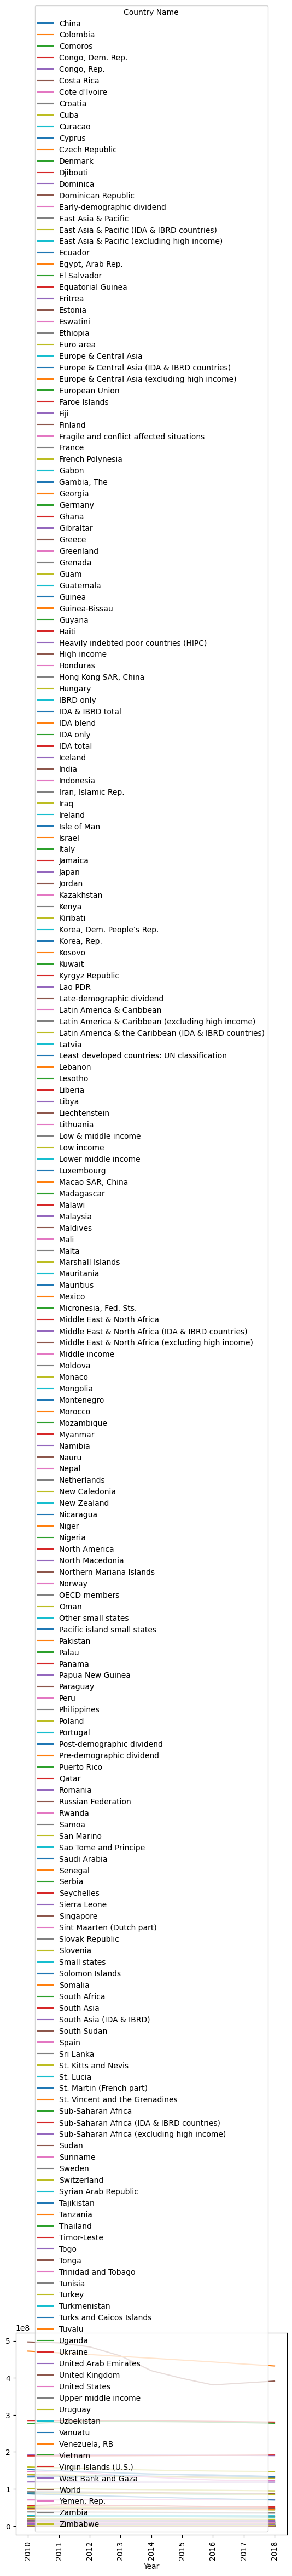

In [ ]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['Country Name', 'Year'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['GDP'] / gdp_pop['Pop']

# Pivot table of gdp_per_capita, where index is date and columns are country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'Year', 'Country Name')

# Convert 'Year' to string to avoid the TypeError
recent_gdp_pop = gdp_pivot.query('Year >= 1991')

# Plot recent_gdp_pop with proper labels
recent_gdp_pop.plot(rot=90)
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita Over Time')
plt.show()


Using .melt() to reshape government data


In [ ]:
# Unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=['year'], var_name='month', 
                       value_name='unempl_rate')

# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['month'] + '-' + ur_tall['year'])

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values('date')

# Plot the unempl_rate by date
ur_sorted.plot(x='date', y='unempl_rate')
plt.show()

Using .melt() for stocks vs bond performance


In [ ]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars='metric', var_name='date', value_name='close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric == "close"')

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date', 
                            suffixes=('_dow', '_bond'), how='inner')

# Plot only the close_dow and close_bond columns
dow_bond.plot(y=['close_dow', 'close_bond'], x='date', rot=90)
plt.show()